## Assignment 4: Pandas

This assignment is about data processing and plotting.

### How to hand in
The assignment is expected to be published on GitHub, but the actual hand-in is on peergrade and should contain only a link to a MyBinder. The assignment should fit in *a single Jupyter Notebook*.

Remember her to use the link provided when first registering your notebook with mybinder (not the url taken from your browsers adress field). See the notebook `12-Assignments` for more information.

## Use pandas dataframe with poverty data
Use this source: https://data.worldbank.org/indicator/SI.POV.DDAY and extract the csv file in jupyter notebook.
With the help of Pandas' DataFrame do the following
1. Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA. (be aware of the missing data in particular years)


<IPython.core.display.Javascript object>


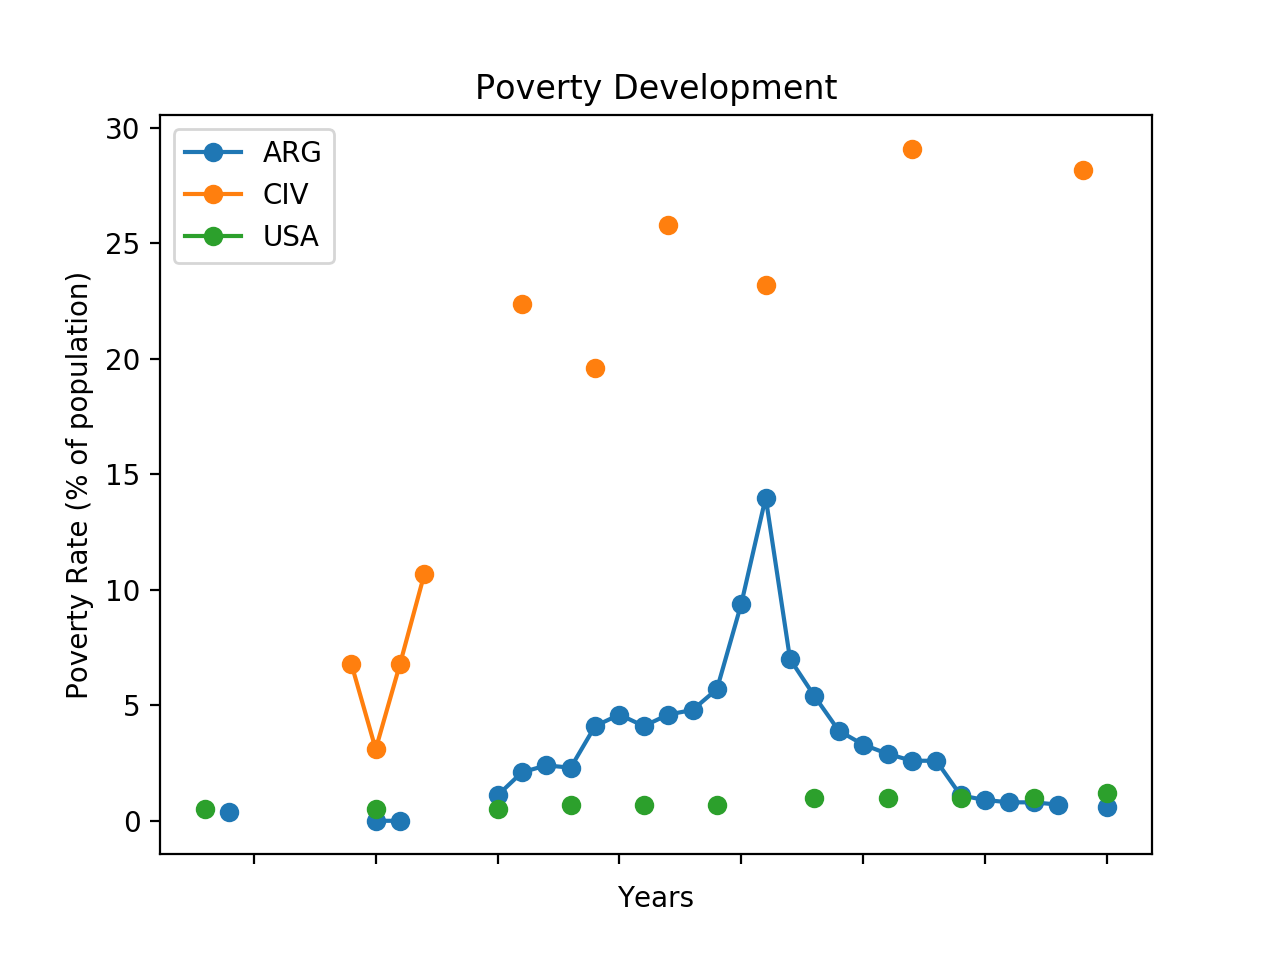

In [4]:
%matplotlib notebook
import pandas as pd
import requests
import os
import zipfile as zp
import numpy as np

#Download Method
def download_file_to_dataframe(url):
    response = requests.get(url)
    fname = response.headers['Content-Disposition'].split("=")[1]
    if response.ok:
        with open(fname, "wb") as f:
            f.write(response.content)

    zp.ZipFile(fname, "r").extractall(".")
    os.remove(fname)

    csv_file_name = f"{fname[:-4]}.csv"
    
    return pd.read_csv(csv_file_name, skiprows=4)
    
url = "http://api.worldbank.org/v2/en/indicator/SI.POV.DDAY?downloadformat=csv"
df = download_file_to_dataframe(url)

def print_poverty_development(country_intrests):
    c_code_df = df[df["Country Name"].isin(country_intrests)]["Country Code"]

    ts_df = df.iloc[c_code_df.index,5:-1].T
    ts_df = ts_df.rename(columns=dict(c_code_df))

    #Plotting
    ax = ts_df.plot(style="o-");
    ax.set_title("Poverty Development")
    ax.set_xlabel("Years")
    ax.set_ylabel("Poverty Rate (% of population)")
    
   

country_intrests = ["Argentina","United States", "Cote d'Ivoire"]
print_poverty_development(country_intrests)

2. Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart

<IPython.core.display.Javascript object>


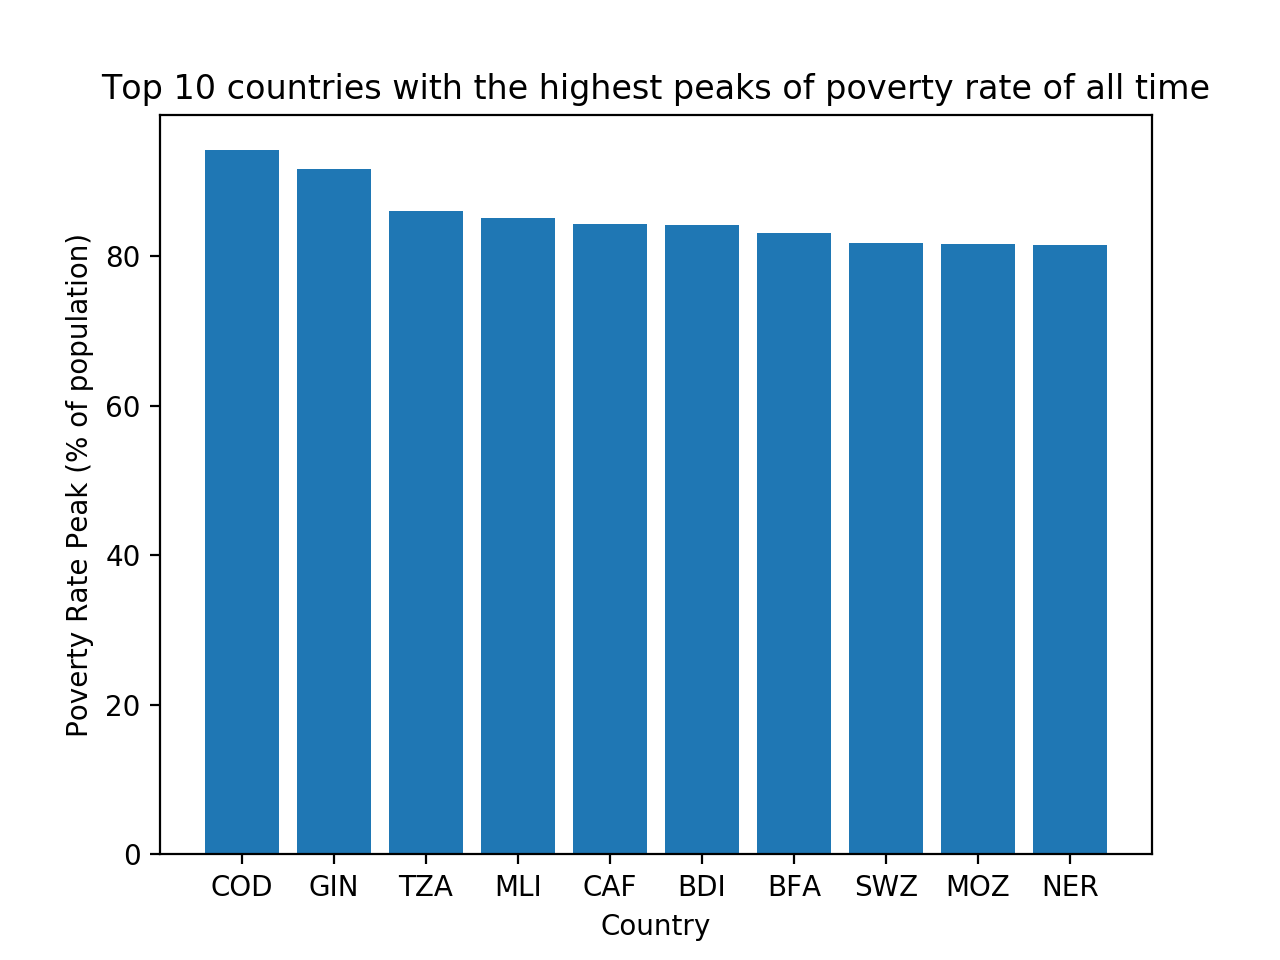

Text(0.5, 1.0, 'Top 10 countries with the highest peaks of poverty rate of all time')

In [7]:
%matplotlib notebook
import math
from matplotlib import pyplot as plt

#getting iloc and transposing it
countries = df.iloc[:,5:-1].T

#Renaming from country number to code
countries = countries.rename(columns=dict(df["Country Code"]))

#Getting dict of country with their year of highest poverty rate
max_years = {n:countries[n].idxmax() for n in df["Country Code"]}

#Replacing the country year with values (but not for the NaN's)
max_values = {n: countries[n][v] 
              for n, v 
              in max_years.items() 
              if not math.isnan(float(max_years[n]))
             }

#Sorting the list by value
sorted_list = sorted(max_values.items(), key=lambda x: -x[1])

#Getting the top 10 as a dictionary
top_10_dict = dict(sorted_list[:10])

#Plotting
plt.bar(top_10_dict.keys(), top_10_dict.values());
plt.ylabel("Poverty Rate Peak (% of population)")
plt.xlabel("Country")
plt.title("Top 10 countries with the highest peaks of poverty rate of all time")

3. Show the development of absolute poverty in all the central american countries. Hand in:
  1. A description of what graphical representation you think is best for this task
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html

> The best data representation for this task would probably just be a line graph, similar to the first graph.

     B. The actual graphical representation in a Jupyter Notebook

<IPython.core.display.Javascript object>


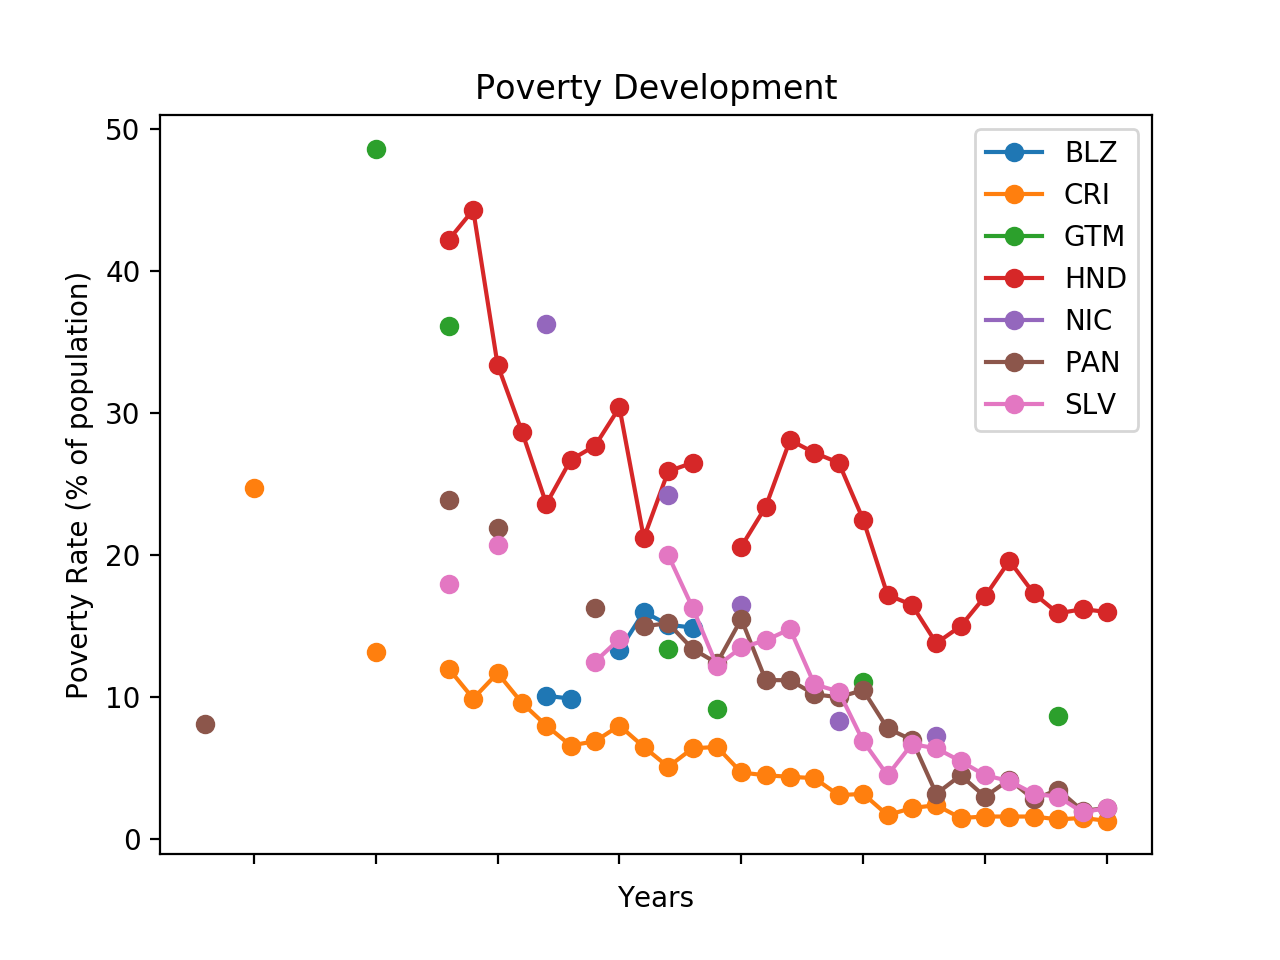

In [8]:
#Simply reusing code from ex1
country_intrests = ["Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras", "Nicaragua", "Panama"]
print_poverty_development(country_intrests)

4. From the worldbank api, find one more interesting question you would like to ask. Hand in:
  1. A description of why that question is interesting

> How has the world life expectancy developed over the years?

  2. A visualisation of the question in your Jupyter Notebook
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html

<IPython.core.display.Javascript object>


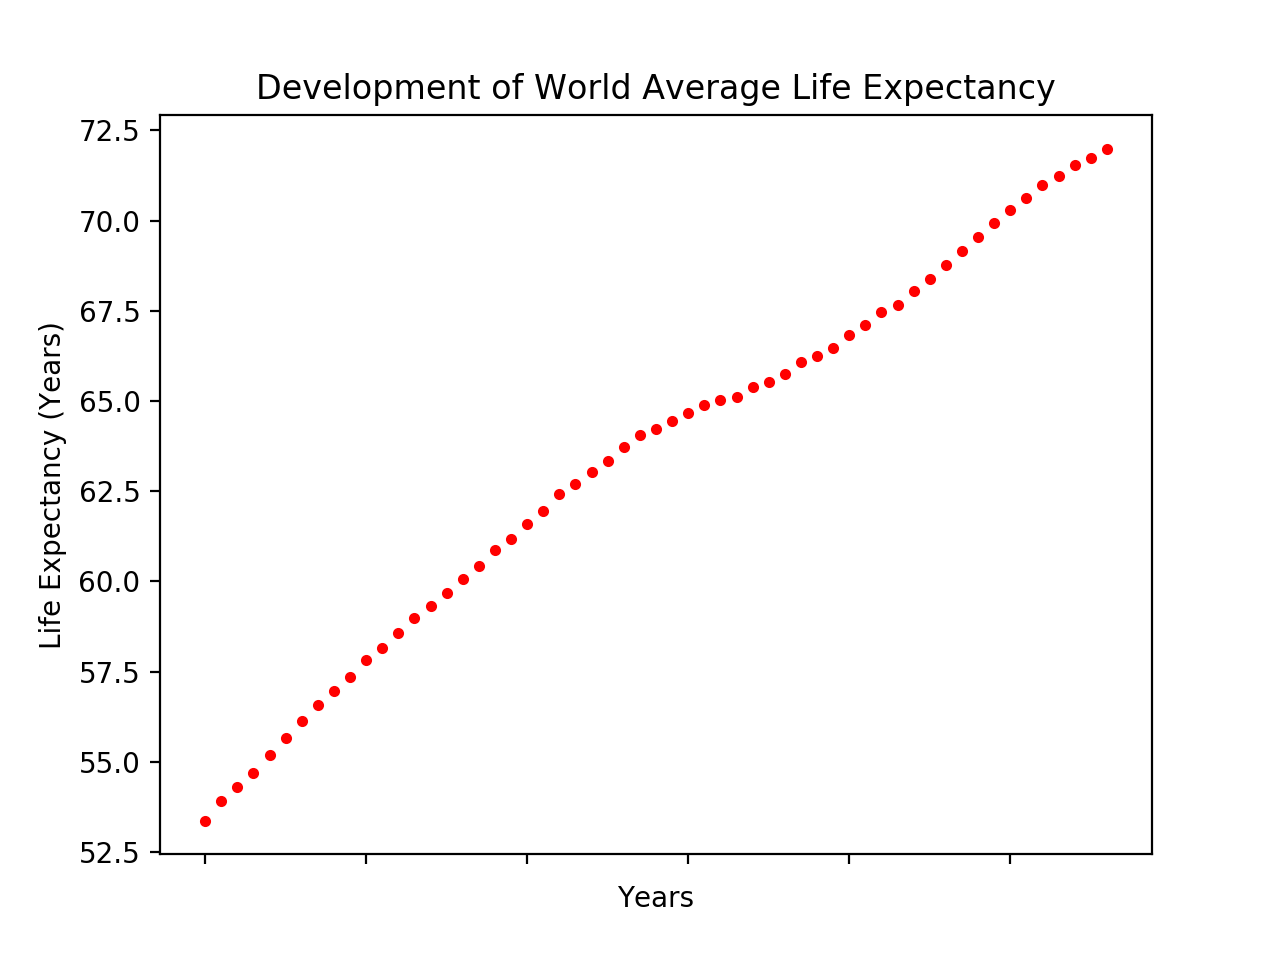

In [9]:
%matplotlib notebook

#getting the data
url = "http://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=csv"
df = download_file_to_dataframe(url)
#Cutting out the relevant data
c_df = df.iloc[:,4:-3]

#Renaming country values (flipping the transpose twice in the process)
df = c_df.T.rename(columns=dict(df["Country Code"])).T

#Getting number of countries and start year
number_of_countries = df.shape[0]
start_year = int(df.T.index[0])


#Getting series of life expectancy sums for each year
c_sums = df.sum(axis = 0, skipna=True)

#Counting how many NaN's there are for each year
nans = df.isnull().sum().astype(int)

#Making years series with values as the total number of countries
total_years = pd.Series(number_of_countries, np.arange(start_year, start_year + nans.shape[0]).astype(str))

#Calculating a series with a count of the number of countries with data for each year
num_of_countries_with_data = total_years - nans

#Calculating life expectancy average for every year
c_year_avgs = c_sums / num_of_countries_with_data

fig, ax = plt.subplots()
c_year_avgs.plot(x="Years", y="Life Expectancy", ax=ax, sharex=False, style="r.")

ax.set_xlabel("Years")
ax.set_ylabel("Life Expectancy (Years)")
ax.set_title("Development of World Average Life Expectancy")
plt.show()